Strava 2022 List Activities and stats
Gianluca Chimentin


Valutazione delle statistiche legate alle mie attività di Strava per l'anno 2022.
Strava è il social network dove si possono registrare tutte le attività sportive.
Il mio profilo Strava è il seguente:
https://www.strava.com/athletes/49726793

I dati di tutte le attività sono stati ricavati attraverso le API che Strava mette a disposizione.
Per utilizzarle, è necessario configurare un APP al seguente indirizzo:
https://www.strava.com/settings/api

La documentazione è presente al seguente link
https://developers.strava.com/docs/reference/
Il servizio utilizzato è il seguente

"List Athlete Activities (getLoggedInAthleteActivities)
Returns the activities of an athlete for a specific identifier. Requires activity:read. Only Me activities will be filtered out unless requested by a token with activity:read_all."

Tutti i link utilizzati per effettuare le chiate tramite Postman sotto la sezione link del progetto.
Le spiegazioni di come usare i link e i token di sessione al seguente video:
https://www.youtube.com/watch?v=sgscChKfGyg

Import librerie e definizione dei parametri

In [1]:
#import data analysis library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import custom function to explore dataset value
from src.explore_functions import df_value_stat

#set display option value
pd.set_option('display.max_columns', None)
sns.set()
#define constant value
RANDOM_STATE = 42
TRAIL_RUNNING_ELEV = 350

In [2]:
#imposta i parametri di stile per la visualizzazione dei grafici
sns.set(font_scale=0.7)
sns.set_style("darkgrid")
sns.set_palette("Paired")

In [3]:
#import dataset of strava activities using Strava API, form more 
df = pd.read_json("data/dataset_strava_gianluca.json")

In [4]:
#display random position of dataset
df.sample(2, random_state=RANDOM_STATE)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,id,start_date,start_date_local,timezone,utc_offset,location_city,location_state,location_country,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,gear_id,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score,average_watts,kilojoules,device_watts
419,2,"{'id': 49726793, 'resource_state': 1}",Morning Run,7047.4,2166,2216,6.0,Run,Run,NaN,4354122747,2020-11-18T06:33:06Z,2020-11-18T07:33:06Z,(GMT+01:00) Europe/Rome,3600,NaN,NaN,NaN,17,0,0,1,0,"{'id': 'a4354122747', 'summary_polyline': 'wyk...",False,False,False,False,everyone,False,None,"[45.4494, 9.163984]","[45.449853, 9.165346]",3.254,4.800,82.4,18.0,True,149.7,171.0,False,True,135.6,128.6,4.654050e+09,4.654050e+09,garmin_push_5837884969,False,6,0,False,44.0,NaN,NaN,NaN
75,2,"{'id': 49726793, 'resource_state': 1}",Recovery run,7247.5,2421,2795,53.0,Run,Run,0.0,7322189996,2022-06-17T05:17:24Z,2022-06-17T07:17:24Z,(GMT+01:00) Europe/Rome,7200,NaN,NaN,NaN,0,1,0,1,0,"{'id': 'a7322189996', 'summary_polyline': '{yk...",False,False,False,False,everyone,False,g9651183,"[45.44942306354642, 9.162770407274365]","[45.44965767301619, 9.163868017494678]",2.994,3.944,80.1,30.0,True,144.2,163.0,False,True,157.2,127.0,7.800677e+09,7.800677e+09,garmin_push_9032131112,False,0,0,False,37.0,NaN,NaN,NaN


In [5]:
#return dataset statistic value based on dataset value
df_value = df_value_stat(df)

In [6]:
df_value

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,resource_state,"2 427 Name: resource_state, dtype: int64",1,int64,0,0.00
1,athlete,"{'id': 49726793, 'resource_state': 1} 427 N...",1,object,0,0.00
2,name,Morning Run 194 Evening R...,125,object,0,0.00
3,distance,0.0 13 7820.5 1 11615.1 1 2782...,415,float64,0,0.00
4,moving_time,1800 12 3605 5 2228 2 2095 2 33...,384,int64,0,0.00
5,elapsed_time,1800 11 3605 4 3602 3 3607 3 36...,382,int64,0,0.00
6,total_elevation_gain,0.0 58 4.0 26 1.0 25 3.0 ...,160,float64,0,0.00
7,type,Run 394 Workout 13 Ride ...,7,object,0,0.00
8,sport_type,Run 380 TrailRun 14 Workout ...,8,object,0,0.00
9,workout_type,0.0 122 1.0 5 3.0 3 10.0 ...,4,float64,296,69.32


Iniziamo la semplificazione del dataset iniziale di 54 righe eliminando le colonne che hanno oltre il 60% dei valori nulli che non reputo importanti per l'analisi

In [7]:
df_value[df_value["null_value_%"]>60.0]

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
9,workout_type,0.0 122 1.0 5 3.0 3 10.0 ...,4,float64,296,69.32
15,location_city,"Series([], Name: location_city, dtype: int64)",0,float64,427,100.00
16,location_state,"Series([], Name: location_state, dtype: int64)",0,float64,427,100.00
17,location_country,"Series([], Name: location_country, dtype: int64)",0,float64,427,100.00
30,gear_id,g9651183 96 g11123897 49 g9651184 1...,3,object,265,62.06
52,average_watts,59.5 1 44.7 1 76.2 1 61.0 1 21.3 ...,10,float64,417,97.66
53,kilojoules,81.3 2 381.3 1 190.9 1 264.6 1 10...,9,float64,417,97.66
54,device_watts,"0.0 10 Name: device_watts, dtype: int64",1,float64,417,97.66


In [8]:
df = df.drop(columns=df_value[df_value["null_value_%"]>60.0]["columns_name"])

In [9]:
df.head(2)

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,start_date_local,timezone,utc_offset,achievement_count,kudos_count,comment_count,athlete_count,photo_count,map,trainer,commute,manual,private,visibility,flagged,start_latlng,end_latlng,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,heartrate_opt_out,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,suffer_score
0,2,"{'id': 49726793, 'resource_state': 1}",40 ' L,7820.5,2412,2412,7.0,Run,Run,8213319572,2022-12-06T06:21:50Z,2022-12-06T07:21:50Z,(GMT+01:00) Europe/Rome,3600,1,2,0,1,0,"{'id': 'a8213319572', 'summary_polyline': 'qyk...",False,False,False,False,everyone,False,"[45.449374951422215, 9.163089925423265]","[45.4495622869581, 9.163387566804886]",3.242,4.107,82.4,15.0,True,161.8,179.0,False,True,188.6,127.6,8.799832e+09,8.799832e+09,garmin_ping_249922102342,False,0,0,False,80.0
1,2,"{'id': 49726793, 'resource_state': 1}",Morning Run,7829.8,2406,2406,0.0,Run,Run,8200380590,2022-12-03T07:58:27Z,2022-12-03T08:58:27Z,(GMT+01:00) Europe/Rome,3600,0,2,0,1,0,"{'id': 'a8200380590', 'summary_polyline': '{zk...",False,False,False,False,everyone,False,"[45.449586594477296, 9.164031464606524]","[45.44984970241785, 9.164545275270939]",3.254,4.346,82.4,17.0,True,162.4,185.0,False,True,177.8,117.6,8.785157e+09,8.785157e+09,garmin_ping_249528929321,False,0,0,False,84.0


Eliminando le colonne con oltre il 60% delle colonne nulle otteniamo 47 colonne

In [10]:
df.shape

(427, 47)

Analisi dei dati e rimozione delle colonne

In base alla tipologia di dati visualizzati sopra ho deciso di semplificare il dataset eliminando le colonne che non reputo "interessanti" al fine dell'analisi statistica annuale:

- resource_state: vale 2 in tutto il dataset, non necessario al fine di analisi sul dataset;
- athlete: nel dataset è presente un solo atleta (io) quindi non è necessario;
- id: si tratta di un valore chiave dell'attività, lo rimuovo in quanto non lo utilizzo per fare le chiamate;
- start_date_local: analogo al valore start_date ma con timezone locale;
- timezone: indica la timezone dell'attività;
- utc_offset: si tratta di 6 valori di tipo numerico nel dataset;
- photo_count: è valorizzato a 0 per tutto il dataset quindi lo tolgo;
- map: si tratta di un oggetto di tipo polilinea che indica la mappa, non è rilevante per le statistiche;
- commute: un solo valore nel dataset è uguale a True, lo rimuovo perchè non riesco a trovare una valore aggiunto;
- private: sono le attività contrassegnate come private (non sono presenti nel mio dataset) quindi le rimuovo;
- visibility: tutte le attività sono visibili quindi non mi serve quindi lo rimuovo;
- flagged: sempre valorizzato a false quindi rimuovo;
- gear_id: nel dataset sono presenti 3 valori differenti, oltre il 60% dei valori è nullo;
- start_latlng: oggetto che indica la latitudine e longitudine di partenza (non analizzato nel dataset);
- end_latlng: oggetto che indica la latitudine e longitudine di arrivo (non analizzato nel dataset);
- heartrate_opt_out: dati di battito cardiaco;
- display_hide_heartrate_option: valore che indica l'opzione di visualizzazione dei dati cardiaci;
- upload_id: valori chiave da utilizzare con altri servizi;
- upload_id_str: valori chiave da utilizzare con altri servizi;
- external_id: valori chiave da utilizzare con altri servizi;
- from_accepted_tag: sempre false tranne in un attività del 2021 quindi lo rimuovo;
- average_watts: numero che indica la potenza durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- kilojoules: numero che indica i kilojoules durante l'attività (si tratta di un valore stimato di Strava in quanto il mio orologio non li misura).Il numero di valori nulli è 417 quindi è già stato rimosso;
- device_watts: il numero di watts indicati dall'attività. Il numero di valori nulli è 417 quindi è già stato rimosso;


Rimuoviamo dunque le seguenti colonne dal Dataset

In [11]:
["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"]

['resource_state',
 'athlete',
 'id',
 'start_date_local',
 'timezone',
 'utc_offset',
 'photo_count',
 'map',
 'commute',
 'private',
 'visibility',
 'flagged',
 'start_latlng',
 'end_latlng',
 'heartrate_opt_out',
 'display_hide_heartrate_option',
 'upload_id',
 'upload_id_str',
 'external_id',
 'from_accepted_tag']

In [12]:
df = df.drop(columns=["resource_state","athlete","id","start_date_local","timezone","utc_offset","photo_count","map","commute","private","visibility","flagged","start_latlng","end_latlng","heartrate_opt_out","display_hide_heartrate_option","upload_id","upload_id_str","external_id","from_accepted_tag"])

In [13]:
df.shape

(427, 27)

Il numero di colonne passa dunque da 54 iniziali a 27

In [14]:
df.sample(5, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
419,Morning Run,7047.4,2166,2216,6.0,Run,Run,2020-11-18T06:33:06Z,17,0,0,1,False,False,3.254,4.800,82.4,18.0,True,149.7,171.0,135.6,128.6,6,0,False,44.0
75,Recovery run,7247.5,2421,2795,53.0,Run,Run,2022-06-17T05:17:24Z,0,1,0,1,False,False,2.994,3.944,80.1,30.0,True,144.2,163.0,157.2,127.0,0,0,False,37.0
177,50' L 5x10'' sprint salita,10489.5,3410,3548,14.0,Run,Run,2021-12-14T06:11:38Z,0,0,0,1,False,False,3.076,6.260,80.7,10.0,True,157.2,180.0,-75.8,-84.0,0,0,False,97.0
30,40 minuti corsa tranquilla,7371.8,2236,2410,41.0,Run,Run,2022-09-04T06:27:51Z,1,3,0,1,False,False,3.297,3.962,82.7,30.0,True,149.4,161.0,208.8,161.6,0,1,False,46.0
358,Evening Run,5770.5,1759,1759,4.0,Run,Run,2021-02-25T18:11:24Z,5,1,0,1,False,False,3.281,4.700,83.0,22.0,True,149.3,169.0,87.6,81.4,3,0,False,36.0


Dei valori presenti nel dataset cercho di chiarire la differenza tra moving time e elapsed time visualizzando le statistiche di base (minino, massimo, media e deviazione standard)

In [15]:
df[["moving_time","elapsed_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
moving_time,427.0,4458.875878,5425.868466,712.0,2411.5,3314.0,4254.0,82800.0
elapsed_time,427.0,4754.044496,5817.174149,737.0,2518.0,3395.0,4336.0,82800.0


<AxesSubplot:>

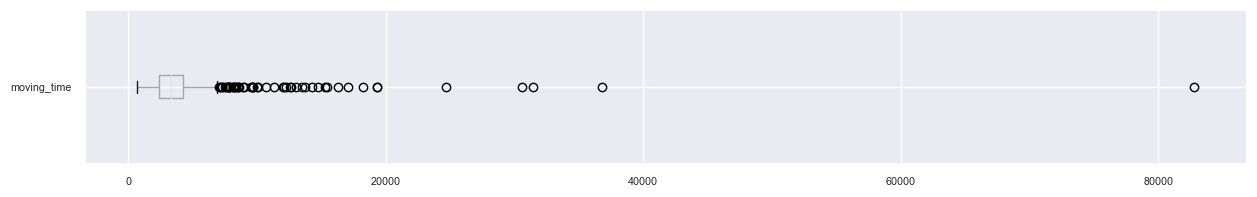

In [16]:
plt.figure(figsize=(15,2))
df[["moving_time"]].boxplot(vert=False)

In [17]:
df[df["moving_time"]==df["moving_time"].max()]

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
28,"Tot dret 130 12000 D+, 39 ore",135000.0,82800,82800,0.0,Run,TrailRun,2022-09-13T19:00:15Z,0,14,4,1,False,True,1.63,0.0,NaN,NaN,False,NaN,NaN,NaN,NaN,0,6,False,NaN


Per chiarire la differenza tra i valori cerco una gara che ho fatto quest'anno di cui ricordo il tempo

In [18]:
df[(df["moving_time"]!=df["elapsed_time"]) & (df["name"].str.contains("Ferriere"))].head(5)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
97,Ferriere Trail Giro di Sardegna 😂 31 km 1600+,29367.4,14732,15278,1542.3,Run,Run,2022-04-30T07:59:08Z,0,10,2,1,False,False,1.922,5.444,70.6,25.0,True,136.5,170.0,1524.5,623.2,0,2,False,164.0


- Moving time: fa riferimento al tempo in movimento durante la gara (il garmin per esempio anche senza essere stoppato tende ad escludere il tempo in cui una persona è ferma);
- Elapsed time: fa riferimento al tempo di durata di tutta l'attività;

Esempio nella gara sopra selezionata il Ferriere Trail il tempo segnato alla fine dal Garmin era più basso del tempo registrato nel cronometro durante la gara.
Questo perchè durante i ristori il garmin ha smesso di registrare il tempo in movimento.
Se alla fine dell'attività contrassegnamo l'attività come gara il tempo visualizzato è diverso (quindi viene considerato l'elapsed time e non il moving time).

Nel dataset può essere utile utilizzare entrambi i valori.


Verifichiamo nuovamente le statistiche a valle della pulizia delle colonne:

In [19]:
df_value_clean = df_value_stat(df)

In [20]:
df_value_clean

,columns_name,value_range,value_range_number,dType,null_value,null_value_%
0,name,Morning Run 194 Evening R...,125,object,0,0.00
1,distance,0.0 13 7820.5 1 11615.1 1 2782...,415,float64,0,0.00
2,moving_time,1800 12 3605 5 2228 2 2095 2 33...,384,int64,0,0.00
3,elapsed_time,1800 11 3605 4 3602 3 3607 3 36...,382,int64,0,0.00
4,total_elevation_gain,0.0 58 4.0 26 1.0 25 3.0 ...,160,float64,0,0.00
5,type,Run 394 Workout 13 Ride ...,7,object,0,0.00
6,sport_type,Run 380 TrailRun 14 Workout ...,8,object,0,0.00
7,start_date,2022-12-06T06:21:50Z 1 2021-06-03T05:35:57Z...,427,object,0,0.00
8,achievement_count,0 231 1 67 2 27 3 20 5 ...,23,int64,0,0.00
9,kudos_count,1 121 2 101 3 83 0 53 4 ...,15,int64,0,0.00


In [21]:
df[df["type"]!= df["sport_type"]]

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score
28,"Tot dret 130 12000 D+, 39 ore",135000.0,82800,82800,0.0,Run,TrailRun,2022-09-13T19:00:15Z,0,14,4,1,False,True,1.630,0.000,NaN,NaN,False,NaN,NaN,NaN,NaN,0,6,False,NaN
33,Morning Workout,45156.5,31461,32199,2385.0,Run,TrailRun,2022-08-27T06:13:27Z,1,9,6,1,False,False,1.435,6.060,NaN,26.0,True,116.9,163.0,940.6,195.6,0,0,False,100.0
34,Cornizzolo X2 30km 2000+,30311.4,18250,19880,1947.0,Run,TrailRun,2022-08-26T13:34:51Z,10,5,0,1,False,False,1.661,5.020,NaN,29.0,True,124.4,182.0,1202.8,367.6,1,0,False,124.0
37,Anello valle Imagna 50 km 3000+ GPS scarico,43777.1,30588,34181,2872.0,Run,TrailRun,2022-08-20T06:54:03Z,2,9,2,1,False,False,1.431,8.360,NaN,29.0,True,136.4,174.0,1430.2,206.2,0,10,False,253.0
43,Cornizzolo notturna 2,15327.0,10704,10710,986.2,Run,TrailRun,2022-08-11T23:39:23Z,5,7,0,1,False,False,1.432,6.480,NaN,25.0,True,131.9,171.0,1226.0,378.7,0,2,False,99.0
44,Cornizzolo notturna 1,15403.6,9672,9973,991.9,Run,TrailRun,2022-08-11T20:51:18Z,11,5,0,1,False,False,1.593,5.567,NaN,25.0,True,142.8,177.0,1226.0,378.7,2,0,False,130.0
49,Morning Trail Run,37149.7,19356,20667,2368.6,Run,TrailRun,2022-08-06T05:30:09Z,0,8,0,3,False,False,1.919,7.010,72.1,27.0,True,146.8,163.0,2197.4,644.0,0,0,False,329.0
50,Evening Workout,7212.6,2803,2897,70.0,Run,TrailRun,2022-08-03T18:12:50Z,1,1,0,1,False,False,2.573,6.660,NaN,27.0,True,133.6,159.0,1157.6,341.6,1,0,False,20.0
51,Evening Workout,8168.2,5472,5709,911.0,Run,TrailRun,2022-08-03T16:05:23Z,8,1,0,1,False,False,1.493,5.300,NaN,31.0,True,150.8,175.0,1157.6,366.2,5,1,False,122.0
54,"Meth 38, tempo 8 e 30",37676.0,24715,31073,2668.0,Run,TrailRun,2022-07-30T06:05:16Z,1,8,1,1,False,False,1.524,4.242,62.1,24.0,True,130.6,165.0,2733.6,914.2,0,3,False,190.0


In [22]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           380
           TrailRun       14
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            3
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Il numero di attività relative al Trail running sono molto basse rispetto al numero di attività che ho effettivamente fatto, non mi torna. Dato che quando faccio delle sessioni di trail faccio solitamente almeno più di 300/400 metri di dislivello faccio una verifica sulle attività che superano questa soglia di dislivello.

In [62]:
df.loc[(df["total_elevation_gain"]>TRAIL_RUNNING_ELEV) & (df["type"]=="Run"),"sport_type"]="TrailRun"

In [113]:
df[["type","sport_type"]].value_counts()

type       sport_type
Run        Run           353
           TrailRun       41
Workout    Workout        13
Ride       Ride           10
Hike       Hike            4
Walk       Walk            3
Swim       Swim            2
Snowboard  Snowboard       1
dtype: int64

Conversione dei dati relativi alla data e indicizzazione del dataset in base alla data

In [67]:
df['start_date'] = pd.to_datetime(df['start_date'])

In [114]:
df = df.set_index(df.start_date)
df

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,SportType,years,day,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-12-06 06:21:50+00:00,40 ' L,7820.5,2412,2412,7.0,Run,Run,2022-12-06 06:21:50+00:00,1,2,0,1,False,False,3.242,4.107,82.4,15.0,True,161.8,179.0,188.6,127.6,0,0,False,80.0,NaN,2022,6,12,Tuesday
2022-12-03 07:58:27+00:00,Morning Run,7829.8,2406,2406,0.0,Run,Run,2022-12-03 07:58:27+00:00,0,2,0,1,False,False,3.254,4.346,82.4,17.0,True,162.4,185.0,177.8,117.6,0,0,False,84.0,NaN,2022,3,12,Saturday
2022-12-01 06:01:08+00:00,40' L,7267.5,2422,2422,19.0,Run,Run,2022-12-01 06:01:08+00:00,0,1,0,1,False,False,3.001,4.324,81.9,12.0,True,151.1,161.0,192.4,116.6,0,0,False,53.0,NaN,2022,1,12,Thursday
2022-11-28 05:40:49+00:00,Morning Run,7480.2,2521,2521,5.0,Run,Run,2022-11-28 05:40:49+00:00,0,3,0,1,False,False,2.967,4.242,80.5,19.0,False,NaN,NaN,153.0,96.8,0,0,False,NaN,NaN,2022,28,11,Monday
2022-11-25 18:02:53+00:00,Evening Run,8014.9,2394,2402,0.0,Run,Run,2022-11-25 18:02:53+00:00,0,5,0,1,False,False,3.348,4.477,82.2,19.0,True,170.0,189.0,48.2,-25.0,0,0,False,111.0,NaN,2022,25,11,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14 08:44:41+00:00,Morning Run,14330.6,4889,4953,4.9,Run,Run,2020-11-14 08:44:41+00:00,21,0,0,1,False,False,2.931,6.400,79.0,22.0,True,145.2,164.0,119.9,114.9,12,0,False,91.0,NaN,2020,14,11,Saturday
2020-11-12 17:27:23+00:00,Evening Run,6920.3,2255,2345,4.0,Run,Run,2020-11-12 17:27:23+00:00,18,1,0,2,False,False,3.069,6.200,80.9,20.0,True,151.4,170.0,144.2,136.8,7,0,False,51.0,NaN,2020,12,11,Thursday
2020-11-11 06:17:11+00:00,Morning Run,6801.8,2405,2405,7.0,Run,Run,2020-11-11 06:17:11+00:00,11,2,2,2,False,False,2.828,4.300,81.0,21.0,True,147.9,162.0,102.4,93.2,3,0,False,51.0,NaN,2020,11,11,Wednesday


Per comodità relativa ai raggruppamenti in considerazione degli anni successivi aggiungiamo anche le colonne relative all'anno, mese e giorno della settimana

In [88]:
df["years"] = df.index.year
df["month"] = df.index.month
df["day_of_week"] = df.index.day_name()

In [115]:
df.sample(2, random_state=RANDOM_STATE)

,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,start_date,achievement_count,kudos_count,comment_count,athlete_count,trainer,manual,average_speed,max_speed,average_cadence,average_temp,has_heartrate,average_heartrate,max_heartrate,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,suffer_score,SportType,years,day,month,day_of_week
start_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-18 06:33:06+00:00,Morning Run,7047.4,2166,2216,6.0,Run,Run,2020-11-18 06:33:06+00:00,17,0,0,1,False,False,3.254,4.800,82.4,18.0,True,149.7,171.0,135.6,128.6,6,0,False,44.0,NaN,2020,18,11,Wednesday
2022-06-17 05:17:24+00:00,Recovery run,7247.5,2421,2795,53.0,Run,Run,2022-06-17 05:17:24+00:00,0,1,0,1,False,False,2.994,3.944,80.1,30.0,True,144.2,163.0,157.2,127.0,0,0,False,37.0,NaN,2022,17,6,Friday


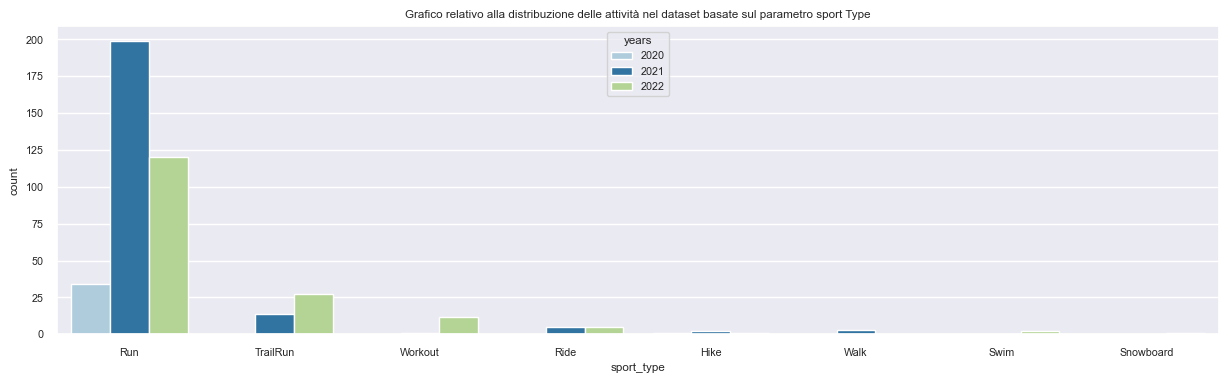

In [127]:
plt.figure(figsize=(15,4))
ax = sns.countplot(data=df, x="sport_type", order=df['sport_type'].value_counts().index, hue="years")
#ax.bar_label(container=ax.containers[1], labels=abs_values[1])
ax.set_title(label="Grafico relativo alla distribuzione delle attività nel dataset basate sul parametro sport Type")
plt.show()

In [131]:
pd.DataFrame(df.groupby(["years","sport_type"]).count()["name"])

name
years sport_type      
2020  Hike           1
      Run           34
2021  Hike           2
      Ride           5
      Run          199
      TrailRun      14
      Walk           3
      Workout        1
2022  Hike           1
      Ride           5
      Run          120
      Snowboard      1
      Swim           2
      TrailRun      27
      Workout       12

In [124]:
abs_values.to_dict()

{('Hike', 2020): 1,
 ('Hike', 2021): 2,
 ('Hike', 2022): 1,
 ('Ride', 2021): 5,
 ('Ride', 2022): 5,
 ('Run', 2020): 34,
 ('Run', 2021): 199,
 ('Run', 2022): 120,
 ('Snowboard', 2022): 1,
 ('Swim', 2022): 2,
 ('TrailRun', 2021): 14,
 ('TrailRun', 2022): 27,
 ('Walk', 2021): 3,
 ('Workout', 2021): 1,
 ('Workout', 2022): 12}